<a href="https://colab.research.google.com/github/MDAyesha/Brain-MRI-Tumor-Detection/blob/main/Brain_MRI_Tumor_Detection_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import warnings

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

LOAD THE DATASET

In [ ]:
data = keras.utils.image_dataset_from_directory("/content/drive/MyDrive/BRAIN MRI/BRAIN MRI")

Found 253 files belonging to 2 classes.


In [ ]:
img = cv2.imread("/content/drive/MyDrive/BRAIN MRI/BRAIN MRI/no/1 no.jpeg")
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)

In [ ]:
batch = data.as_numpy_iterator().next()

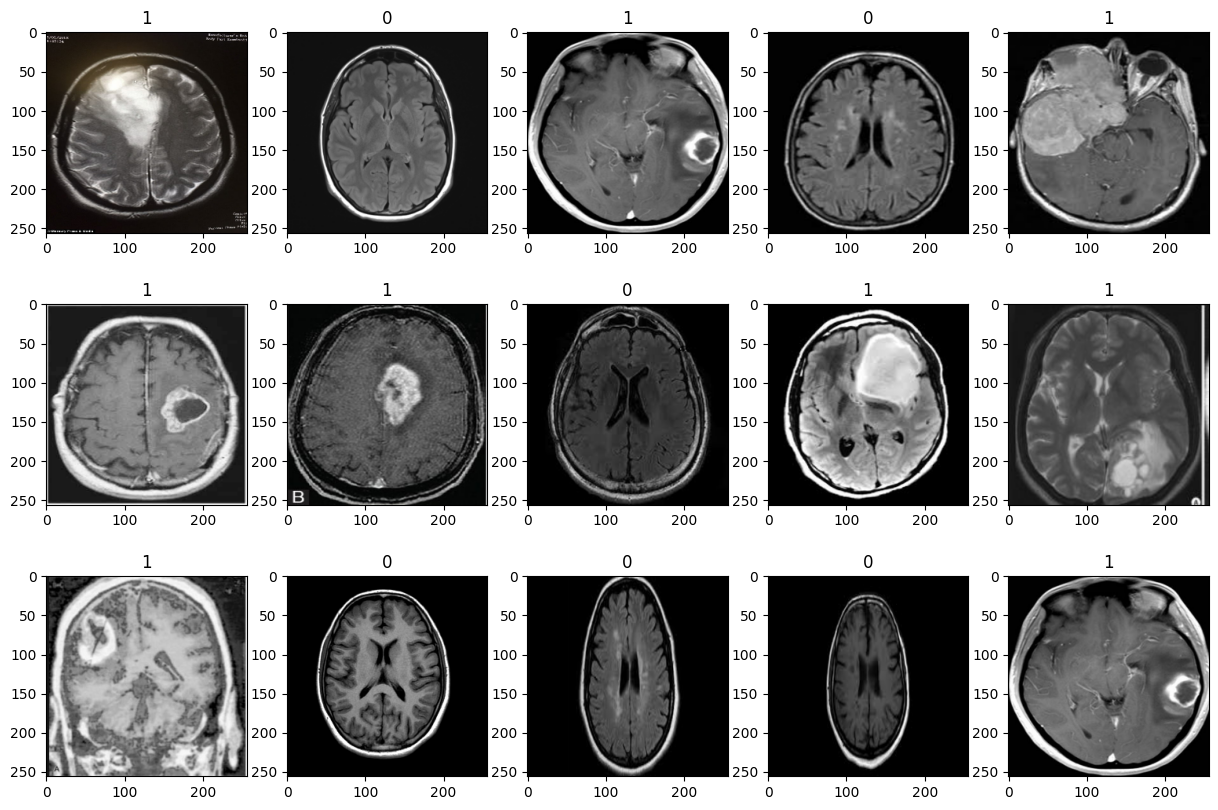

In [ ]:
#If a brain has tumor it is labeled as 1, if no it is labeled as 0
fig, ax = plt.subplots(3, 5, figsize=(15,10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

DATA SCALING

In [ ]:
data = data.map(lambda x,y: (x/255, y)) #normalize
batch = data.as_numpy_iterator().next()

In [ ]:
print("Minimum value of the scaled data:", batch[0].min())
print("Maximum value of the scaled data:", batch[0].max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


TRAIN-VALID-TEST SPLIT

In [ ]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.2)+1
print("Train Size:", train_size)
print("Validation Size:", val_size)
print("Test Size:", test_size)
print("Sum of Train, Validation and Test sizes is equal to:", train_size + val_size + test_size)

Train Size: 4
Validation Size: 2
Test Size: 2
Sum of Train, Validation and Test sizes is equal to: 8


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

DATA AUGMENTATION

In [ ]:
batch = data.as_numpy_iterator().next()

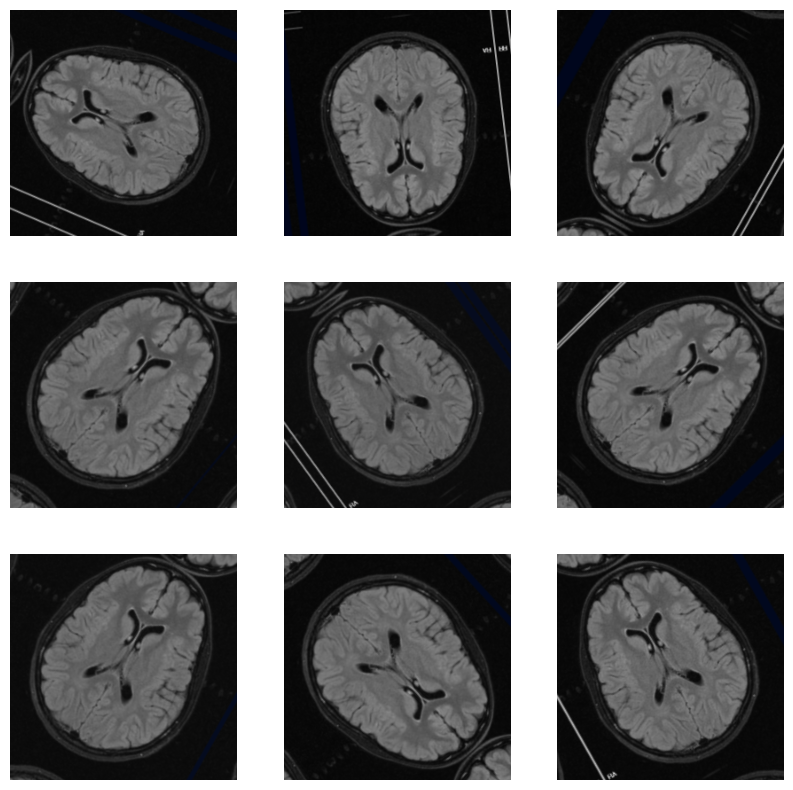

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.2)
])

image = batch[0]


plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

Building Model

In [ ]:
model = Sequential([
    data_augmentation,
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      25632     
                                                      

In [ ]:
history = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
4/4 [==============================] - 38s 9s/step - loss: 0.6235 - accuracy: 0.6250 - val_loss: 0.5968 - val_accuracy: 0.7344
Epoch 2/15
4/4 [==============================] - 41s 11s/step - loss: 0.5676 - accuracy: 0.7188 - val_loss: 0.5428 - val_accuracy: 0.7031
Epoch 3/15
4/4 [==============================] - 37s 9s/step - loss: 0.6168 - accuracy: 0.6484 - val_loss: 0.5684 - val_accuracy: 0.7812
Epoch 4/15
4/4 [==============================] - 34s 9s/step - loss: 0.5847 - accuracy: 0.7109 - val_loss: 0.4879 - val_accuracy: 0.7656
Epoch 5/15
4/4 [==============================] - 33s 9s/step - loss: 0.5666 - accuracy: 0.7031 - val_loss: 0.4825 - val_accuracy: 0.7656
Epoch 6/15
4/4 [==============================] - 32s 8s/step - loss: 0.5651 - accuracy: 0.7188 - val_loss: 0.5204 - val_accuracy: 0.7500
Epoch 7/15
4/4 [==============================] - 31s 8s/step - loss: 0.5343 - accuracy: 0.7500 - val_loss: 0.5066 - val_accuracy: 0.7344
Epoch 8/15
4/4 [=================

PLOT PERFORMANCE

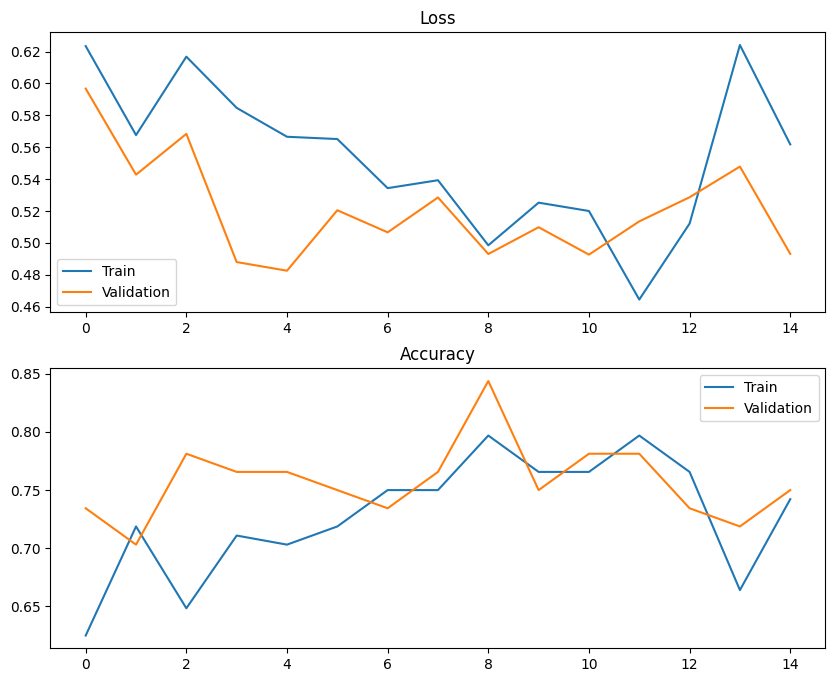

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))

ax[0].plot(history.history["loss"], label="Train")
ax[0].plot(history.history["val_loss"], label="Validation")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], label="Train")
ax[1].plot(history.history["val_accuracy"], label="Validation")
ax[1].title.set_text("Accuracy")
ax[1].legend()

plt.show()

In [ ]:
bin_acc = BinaryAccuracy()
recall = Recall()
precision = Precision()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

print("Accuracy:", bin_acc.result().numpy(), "\nRecall:", recall.result().numpy(), "\nPrecision:", precision.result().numpy())

1/1 [==============================] - 1s 1s/step
Accuracy: 0.7704918 
Recall: 0.9444444 
Precision: 0.73913044


TESTING

In [ ]:
batch = test.as_numpy_iterator().next()

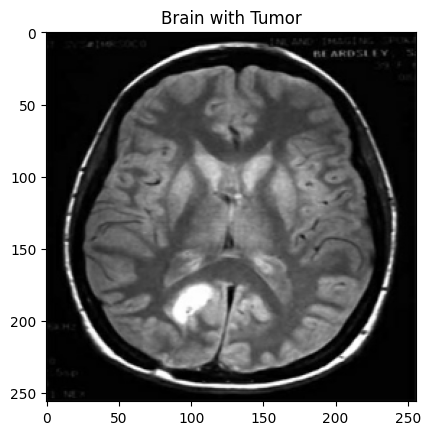

In [ ]:
img, label = batch[0][15], batch[1][15]
plt.imshow(img)
if label==1:
    plt.title("Brain with Tumor")
else:
    plt.title("Brain with No Tumor")
plt.show()

In [ ]:
y_hat = model.predict(np.expand_dims(img, 0))
y_hat

1/1 [==============================] - 0s 62ms/step


array([[0.8325215]], dtype=float32)

In [ ]:
if y_hat < 0.5:
    print("No tumor detected")
else:
    print("Tumor detected")

Tumor detected
